<a href="https://colab.research.google.com/github/kp0007/MSAI_kp35262/blob/main/Copy_of_kp_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplcursors

In [ ]:
# prompt: check python package matplotlib version

import matplotlib
print(matplotlib.__version__)


3.7.1


In [3]:
# Import necessary packages
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load patients data
d1 = files.upload()
patients = pd.read_csv('PATIENTS.csv')


Saving PATIENTS.csv to PATIENTS.csv


In [6]:
# Load patients data
d2 = files.upload()
admissions = pd.read_csv('ADMISSIONS.csv')


Saving ADMISSIONS.csv to ADMISSIONS.csv


In [7]:
d2_unique = admissions.drop_duplicates(subset=['subject_id'])
d2_unique['subject_id'].value_counts()

,count
subject_id,
10006,1
40687,1
42231,1
42199,1
42135,1
...,...
10089,1
10088,1
10083,1


In [8]:
m1_pat_adm_uni = pd.merge(patients, d2_unique, on='subject_id')
m1_pat_adm_uni.head()

,row_id_x,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,row_id_y,hadm_id,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,12258,142345,...,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1,12263,105331,...,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1,12265,165520,...,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1,12269,199207,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1,12270,177759,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [ ]:
m1_pat_adm_uni['subject_id'].value_counts()

,count
subject_id,
10006,1
40687,1
42231,1
42199,1
42135,1
...,...
10089,1
10088,1
10083,1


In [ ]:
m1_pat_adm_uni['insurance'].value_counts()

,count
insurance,
Medicare,76
Private,19
Medicaid,4
Government,1


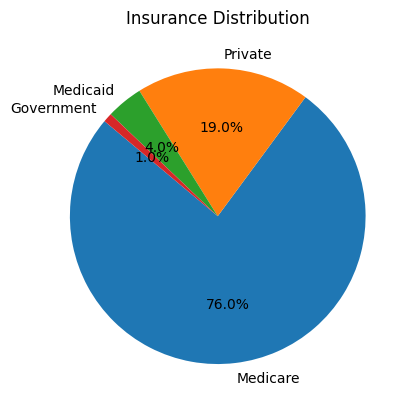

In [9]:

labels = m1_pat_adm_uni['insurance'].unique()
sizes = m1_pat_adm_uni['insurance'].value_counts()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Insurance Distribution')
plt.show()

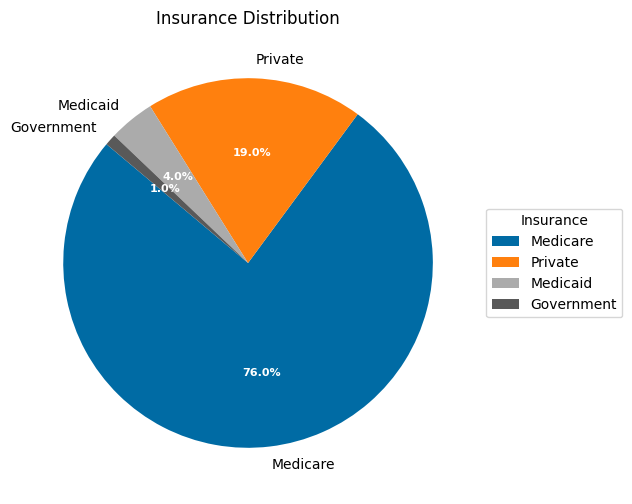

In [19]:
plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

labels = m1_pat_adm_uni['insurance'].unique()
sizes = m1_pat_adm_uni['insurance'].value_counts()



wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
for autotext in autotexts: autotext.set_color('white')

ax.legend(wedges, labels ,
          title="Insurance",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Insurance Distribution")

plt.show()